Link to Repo: https://github.com/nishalsach/ml_final/blob/main/msd_year_prediction.ipynb

# Imports

In [1]:
%load_ext autoreload

In [2]:
%autoreload 2

In [3]:
import pandas as pd
import numpy as np
pd.set_option("max_columns", None)
from sklearn.preprocessing import MinMaxScaler, RobustScaler
import seaborn as sns
from sklearn.linear_model import SGDRegressor, Ridge, Lasso, LinearRegression, RidgeCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import mutual_info_regression, f_regression
import time
from src.data.utils import is_normal
from src.models.train_model import evaluate_models, select_k_best
from src.visualization.visualize import plot_model_evals
import pickle

# mpl config to make sure grid is always behind the plot
plt.rcParams['axes.axisbelow'] = True


In [4]:
music_df = pd.read_csv("data/raw/YearPredictionMSD.txt", sep=",", header=None)

In [5]:
music_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,-2.46783,3.32136,-2.31521,10.20556,611.10913,951.08960,698.11428,408.98485,383.70912,326.51512,238.11327,251.42414,187.17351,100.42652,179.19498,-8.41558,-317.87038,95.86266,48.10259,-95.66303,-18.06215,1.96984,34.42438,11.72670,1.36790,7.79444,-0.36994,-133.67852,-83.26165,-37.29765,73.04667,-37.36684,-3.13853,-24.21531,-13.23066,15.93809,-18.60478,82.15479,240.57980,-10.29407,31.58431,-25.38187,-3.90772,13.29258,41.55060,-7.26272,-21.00863,105.50848,64.29856,26.08481,-44.59110,-8.30657,7.93706,-10.73660,-95.44766,-82.03307,-35.59194,4.69525,70.95626,28.09139,6.02015,-37.13767,-41.12450,-8.40816,7.19877,-8.60176,-5.90857,-12.32437,14.68734,-54.32125,40.14786,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,4.59210,2.21920,0.34006,44.38997,2056.93836,605.40696,457.41175,777.15347,415.64880,746.47775,366.45320,317.82946,273.07917,141.75921,317.35269,19.48271,-65.25496,162.75145,135.00765,-96.28436,-86.87955,17.38087,45.90742,32.49908,-32.85429,45.10830,26.84939,-302.57328,-41.71932,-138.85034,202.18689,-33.44277,195.04749,-16.93235,-1.09168,-25.38061,-12.19034,-125.94783,121.74212,136.67075,41.18157,28.55107,1.52298,70.99515,-43.63073,-42.55014,129.82848,79.95420,-87.14554,-45.75446,-65.82100,-43.90031,-19.45705,12.59163,-407.64130,42.91189,12.15850,-88.37882,42.25246,46.49209,-30.17747,45.98495,130.47892,13.88281,-4.00055,17.85965,-18.32138,-87.99109,14.37524,-22.70119,-58.81266,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,1.39518,2.73553,0.82804,7.46586,699.54544,1016.00954,594.06748,355.73663,507.39931,387.69910,287.15347,112.37152,161.68928,144.14353,199.29693,-4.24359,-297.00587,-148.36392,-7.94726,-18.71630,12.77542,-25.37725,9.71410,0.13843,26.79723,6.30760,28.70107,-74.89005,-289.19553,-166.26089,13.09302,5.89085,6.89034,-10.97160,1.67565,11.43523,-7.27994,133.08169,141.86758,-56.99356,98.15952,18.50939,16.97216,24.26629,-10.50788,-8.68412,54.75759,194.74034,7.95966,-18.22685,0.06463,-2.63069,26.02561,1.75729,-262.36917,-233.60089,-2.50502,-12.14279,81.37617,2.07554,-1.82381,183.65292,22.64797,-39.98887,43.37381,-31.56737,-4.88840,-36.53213,-23.94662,-84.19275,66.00518,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,-6.36304,6.63016,-3.35142,37.64085,2174.08189,697.43346,459.24587,742.78961,229.30783,387.89697,249.06662,245.89870,176.20527,98.82222,150.97286,78.49057,-62.00282,43.49659,-96.42719,-108.96608,14.22854,14.54178,-23.55608,-39.36953,-43.59209,20.83714,35.63919,-181.34947,-93.66614,-90.55616,-0.01744,23.22717,-25.48348,-25.88070,12.59198,-24.85116,-7.20736,778.02248,61.15940,23.37585,-97.64925,4.56917,-37.32280,4.15159,12.24315,35.02697,-178.89573,82.46573,-20.49425,101.78577,-19.77808,-21.52657,3.36303,-11.63176,51.55411,-50.57576,-28.14755,-83.15795,-7.35260,-22.11505,1.18279,-122.70467,150.57360,24.37468,41.19821,-37.04318,-28.72986,162.19614,22.18309,-8.63509,85.23416,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,0.93609,1.60923,2.19223,47.32082,894.28471,809.86615,318.78559,435.04497,341.61467,334.30734,322.99589,190.61921,235.84715,96.89517,210.58870,5.60463,-199.63958,204.85812,-77.17695,-65.79741,-6.95097,-12.15262,-3.85410,20.68

In [6]:
print(music_df.shape)

(515345, 91)


As described in the UCI Machine Learning Repository, this dataset contains 90 features. These features come from the 12-dimensional timbre vector that describes each individual "segment" in a given track. The first 12 columns pertain to the averages of the timbre vectors, and the last 78 correspond to the covariances of dimensions across vectors of multiple segments.

# Train Test Split

We do the train-stest split early on in the modelling process because the test set should not be touched by any of the feature selections and evaluations we run, in order to prevent train-test leakage. The split is also done manually because the UCI repository gives specific indices we must split at, so that we avoid the **producer effect**, by making sure no song from a given artist ends up in both the train and test set.

We first check for NaN values to make sure the data is good quality, and to think about any imputation strategies in advance.

In [7]:
# Check for NaN values to make sure the data is good, and to think about 
# any imputation strategies in advance
music_df.isnull().values.any()

False

No NaN values, this makes our job considerably easier, and also reduces the scope for any biases to be introduced in the modelling at the imputation stage. We can next just run the Train/Test Split.

In [8]:
# Make train/test data
train_X = music_df.iloc[:463715, 1: ]
train_X.columns = np.arange(len(train_X.columns))
test_X = music_df.iloc[463715:, 1: ]
test_X.columns = np.arange(len(test_X.columns))

train_y = music_df.iloc[:463715, 0]
test_y = music_df.iloc[463715:, 0]


We will use 3 regression metrics in this notebook:

1. MSE: Mean Squared Error of predictions
2. MAE: Mean Absolute Error of predictions
3. R2: R-squared for the model

Hence, an important thing to do at this stage is to compute the mean and median baselines for the models, based on our newly segregated test data. This will help provide context to any regression metrics we calculate later on.  

For instance, we can compare the MSE from a given model to the MSE from just calculating the mean or the median year of release for the full data and using that as the target value for each sample. If the model's MSE is worse than that from just predicting the mean/median, this means that the model isn't actually very useful. 

**Note**: The mean/median predictions can only be used to get baselines for the MSE and MAE, not the R2 score. Since the mean/median predictions are the same for all rows, the overall R2 score is useless for the mean/median predictions. 

In [9]:
# Get the baselines
mean_y = np.asarray([test_y.mean()]*test_y.shape[0])
median_y = np.asarray([test_y.median()]*test_y.shape[0])

# Feature Selection

In this section, we will determine the best feature selection method for our data, given the feature distributions. I will consider two univariate, filter-based methods: 

1. **Correlation-based**: selects for features having high correlation with target. Assumes normal distribution of data.
2. **Mutual-Information-based**: selects for features having mutual information with target. Non-parametric.

Since the correlation-based method of feature selection assumes a normal distribution, let us first check if our features are actually normally distributed.

In [10]:
normal = 0
not_normal = 0

for index in range(0, train_X.shape[1]):
    feature_series = train_X.iloc[:, index]
    if is_normal(feature_series, alpha=0.1):
        normal+=1
    else:
        not_normal+=1

print(f"Count of Gaussian Features: {normal}")
print(f"Count of Non-Gaussian Features: {not_normal}")

Count of Gaussian Features: 0
Count of Non-Gaussian Features: 90


Since none of our features actually exhibit a Gaussian distribution, we check the MI-based feature selection method. It turns out however, that this method is quite computationally expensive (as seen in the image below). 

<img src='img/MIR.png' width="1000">

So instead, I opted to run it once, save the results, and use these calculated MI values to test out different thresholds for the mutual information later on. 

In [11]:
# Reading in the MI for features
with open('data/processed/mir_features.pkl', 'rb') as fh:
    mir_arr = pickle.load(fh)

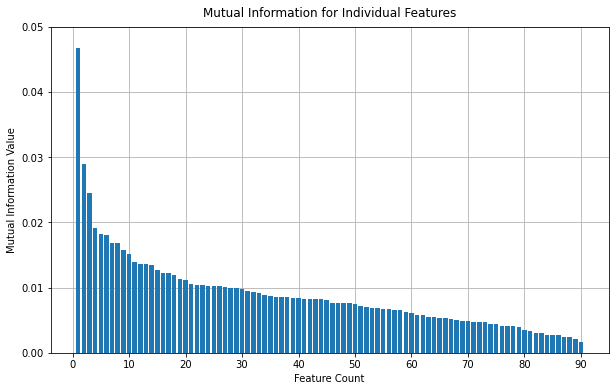

In [12]:
# Visualising calculated feature importances
plt.figure(figsize=(10, 6))
plt.bar([i for i in range(1, len(mir_arr)+1)], sorted(mir_arr)[::-1]);
plt.grid()
plt.title("Mutual Information for Individual Features", size=12, pad=10);
plt.xlabel("Feature Count");
plt.ylabel("Mutual Information Value");
plt.xticks(np.arange(0, 91, 10));
plt.yticks(np.arange(0, 0.06, 0.01));

It is worth noting that a very small set of features actually have a very high amount of mutual information with the target. However, the actual values of mutual information are not very high. Hence, although this method is worth testing out, it is a good idea to include multiple threshold values: including a value of 0 (i.e. all features are included). 

**Note**: At this point, I would also consider trying out certain wrapper-based methods for feature selection eg. Recursive Feature Elimination, Sequential Feature Selection etc. However, wrapper-based methods involve extensive and repeated training of machine learning models multiple times, in order to find the subset of features that minimises collinearity and maximises the chosen regression metric. Given the size of this dataset (>500k rows, 90 columns), I simply lack the computational resources to explore wrapper-based methods and tune their hyperparameters in a reasonable amount of time. Hence, that process is not a part of this notebook. 

# Model Evaluation

We now evaluate a basic set of models on this data. The purview of models explored here is a little limited here, due to computational constraints. In the interest of more rigorous testing (i.e. include different thresholds for feature selection, evaluate n-folds for cross-validation), I have opted to train models with lower training times. 

In [13]:
# Dict of models to evaluate
models_dict = {
    
    'Linear Regression': LinearRegression(), # a basic model to test
    
    'Lasso': Lasso(), # to check if the few high MI features are actually important
    
    'Ridge': Ridge(alpha = 1.0), # as a counter point to lasso, to award all features equal importances
    
    'Decision Tree': DecisionTreeRegressor(
        min_samples_split = 0.1, 
        max_depth = None), # tree-based model
    
}

In [14]:
%%time 

# List to append to
results_mean = []
results_std = []

# Iterate and evaluate
for model_name in models_dict:
    
    print("\nEvaluating: ", model_name)
    
    # Get the model specs
    model_specs = models_dict[model_name]
    
    # Iterate over possible k for k-best features
    for k_value in [20, 50, 80, 90]: 
        
        # Print the k
        print(f"Evalute {k_value}-best features.")
        
        # Get the subsetted train data
        train_X_k = select_k_best(train_X, mir_arr, k_value)
    
        # Train and evaluate
        model_results = evaluate_models(model_specs, train_X_k, train_y, n_folds=5)
        
        # Process the results
        mse = model_results['test_mse']*-1
        mae = model_results['test_mae']*-1
        r2 = model_results['test_r2_score']

        # Add to results
        results_mean.append([
            model_name, mse.mean(), mae.mean(), r2.mean(), k_value
        ])

        results_std.append([
            model_name, mse.std(), mae.std(), r2.std(), k_value
        ])
        


Evaluating:  Linear Regression
Evalute 20-best features.
Calling 5-fold Cross-Validation ... 
Training complete, time taken: 5.315237998962402

Evalute 50-best features.
Calling 5-fold Cross-Validation ... 
Training complete, time taken: 7.892210960388184

Evalute 80-best features.
Calling 5-fold Cross-Validation ... 
Training complete, time taken: 24.382089138031006

Evalute 90-best features.
Calling 5-fold Cross-Validation ... 
Training complete, time taken: 24.163666009902954


Evaluating:  Lasso
Evalute 20-best features.
Calling 5-fold Cross-Validation ... 
Training complete, time taken: 1.5594048500061035

Evalute 50-best features.
Calling 5-fold Cross-Validation ... 
Training complete, time taken: 3.269970178604126

Evalute 80-best features.
Calling 5-fold Cross-Validation ... 
Training complete, time taken: 6.084625959396362

Evalute 90-best features.
Calling 5-fold Cross-Validation ... 
Training complete, time taken: 8.678614139556885


Evaluating:  Ridge
Evalute 20-best featu

In [15]:
# Make DFs
mean_df = pd.DataFrame(
    results_mean, 
    columns = ['ModelName', 'MSE', 'MAE', 'R2', 'k_value']
).set_index('ModelName').sort_values('MSE')

std_df = pd.DataFrame(
    results_std, 
    columns = ['ModelName', 'MSE', 'MAE', 'R2', 'k_value']
).set_index('ModelName').sort_values('MSE')


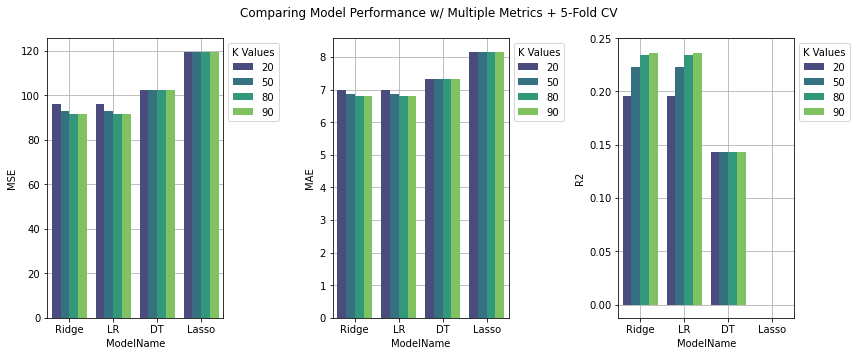

In [16]:
# Plot performances
fig, axes = plt.subplots(1, 3, figsize=(12, 5))

fig.suptitle('Comparing Model Performance w/ Multiple Metrics + 5-Fold CV')

sns.barplot(
    ax=axes[0], 
    data=mean_df.reset_index(), 
    x='ModelName', y='MSE', 
    hue='k_value', #alpha = 0.9
    palette='viridis', 

)

sns.barplot(
    ax=axes[1], 
    data=mean_df.reset_index(), 
    x='ModelName', y='MAE', 
    hue='k_value', #alpha = 0.9
    palette='viridis'
)

sns.barplot(
    ax=axes[2], 
    data=mean_df.reset_index(), 
    x='ModelName', y='R2', 
    hue='k_value', #alpha = 0.9
    palette='viridis'
)

#place legend in top right corner
axes[0].legend(title="K Values", bbox_to_anchor=(1,1), loc="upper left");
axes[1].legend(title="K Values", bbox_to_anchor=(1,1), loc="upper left");
axes[2].legend(title="K Values", bbox_to_anchor=(1,1), loc="upper left");

axes[0].grid()
axes[1].grid()
axes[2].grid()

    
axes[0].set_xticklabels(['Ridge', 'LR', 'DT', 'Lasso'])
axes[1].set_xticklabels(['Ridge', 'LR', 'DT', 'Lasso'])
axes[2].set_xticklabels(['Ridge', 'LR', 'DT', 'Lasso'])

axes[2].set_yticks(np.arange(0, 0.30, 0.05));

fig.tight_layout()

We see that the Ridge Regression and the Linear Regression models trained on the full dataset yield the lowest levels of MSE and MAE, as well as the highest values of R2. We now have to choose between one of the two. Seeing as we are going to have an as-yet-unseen test dataset, it is wiser to select the model that is inherently more generalisable. Hence, I chose the Ridge Regression model for its better regularisation capability.  

In the next section, I will demonstrate the use of the Ridge model for the prediction of years for the test data. I will then go ahead and compare its performance with the previously caculated mean and median baselines. 

# Training

I now use the Ridge Regression model for training. In this process, I also try out a few different alpha parameters for the model, which affect the strength of regularisation. I use the RidgeCV functionality in sklearn to carry this out. 

In [17]:
# Initialise scaler
scaler = MinMaxScaler()

# Transform the train and test data
train_X_trans = scaler.fit_transform(train_X)
test_X_trans = scaler.transform(test_X)

# Setup Ridge
reg_model = RidgeCV(
    alphas = (0.01, 0.1, 1.0, 5.0, 10.0, 20, 50, 200), # Some different alphas to try
    cv = 5, # 5-fold cross validation
    scoring='neg_mean_squared_error') # Use MSE to find the best alpha

# Call the fit
reg_model.fit(
    train_X_trans, train_y
)

RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 5.e+00, 1.e+01, 2.e+01, 5.e+01, 2.e+02]),
        cv=5, scoring='neg_mean_squared_error')

In [18]:
# What is the estimated alpha value
print("Estimated alpha value: ", reg_model.alpha_)

# What is the score with the best alpha
print("Train MSE with estimated alpha value: ", reg_model.best_score_*-1)


Estimated alpha value:  1.0
Train MSE with estimated alpha value:  91.4277546999044


Worth noting here: the default alpha value is the best one, and that the train MSE is actually pretty decent. Reassurng signals, even though there's been a good degree of testing and evaluation so far. 

In [19]:
# Call predict
pred_y = reg_model.predict(test_X_trans)
pred_y = np.asarray([int(pred) for pred in pred_y]) # convert years to integers

In [20]:
# Test metrics array
test_metrics = []

# Compare Metrics of predictions with baselines
for some_preds in [pred_y, mean_y, median_y]:
    
    test_metrics.append([
        mean_squared_error(test_y, some_preds), 
        mean_absolute_error(test_y, some_preds), 
        # r2_score(test_y, some_preds)
    ])

# Convert to dataframe
test_metrics = pd.DataFrame(
    test_metrics, 
    index=['Ridge', 'Mean', 'Median'], 
    columns=['MSE', 'MAE'])

In [21]:
test_metrics

,MSE,MAE
Ridge,90.784040,6.899090
Mean,117.763947,8.083406
Median,130.043657,7.587837


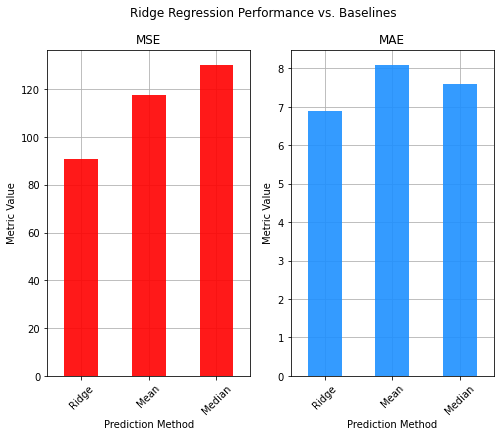

In [22]:
# Plot performance
test_metrics.plot(
        kind='bar', 
        subplots=True, 
        layout=(1, 2), 
        figsize=(8, 6), 
        rot=45, 
        grid=True, 
        sharex=False, 
        xlabel = 'Prediction Method', 
        ylabel = 'Metric Value', 
        legend=False, 
        alpha = 0.9, 
        title = f'Ridge Regression Performance vs. Baselines', 
        color=['red', 'dodgerblue']
    );

We observe that the Ridge regression model does significantly better compared to the baseline MSE and MAE values i.e. its a decently good fit for the data, and is certainly better than not doing any modelling at all. Its regularisation capabilities enable it to perform well on the data. 

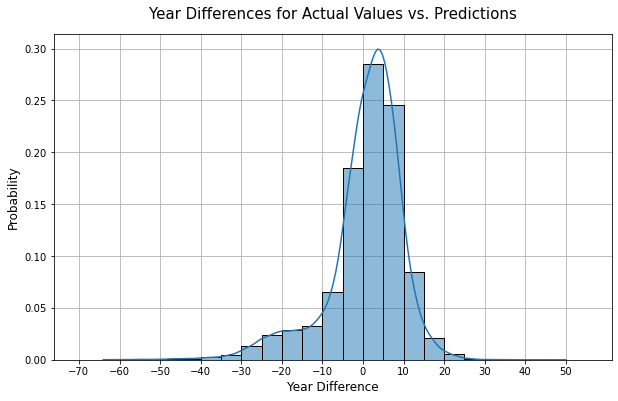

In [23]:
# Plot the differences of years
diff_y = test_y - pred_y
plt.figure(figsize=(10, 6))

sns.histplot(
    # np.abs(diff_y)
    diff_y, 
    bins = np.arange(-70, 60, 5), 
    kde=True, 
    stat='probability'
)
plt.xticks(np.arange(-70, 60, 10));
plt.grid()

plt.title("Year Differences for Actual Values vs. Predictions", size=15, pad=15);
plt.xlabel("Year Difference", size=12);
plt.ylabel("Probability", size=12);

The plot above adds to the evidence that the Ridge regression model performs well - it is most likely to predict the correct year for a song (signified by difference = 0) than it is to predict an incorrect year. Further, even when it fails to predict the correct year, it still identifies the correct decade for the song most of the times (signified by the range of differences +-10 years). This is evidence that the model is able to tap into some temporal trends in sonic features that may be a result of the prevalent musical styles of the era. 

Future experiments could test out other feature-selection and engineering methods on the training data as well, seeing that MI-based feature reduction doesn't yield very useful feature sets. One could also experiment with more computationally intensive prediction methods (eg. Random Forest Regressor, Gradient Boosting Regressor, etc.) if time and resources permit. Regardless, we've now obtained a relatively inexpensive model that does really well on the regression task. 